In [45]:
import torch
from transformers import BertTokenizer
import random
import nltk
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

### Read the file and tokenization of text ###

In [38]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

with open('wsj_untokenized.txt', 'r') as f:
    text = f.read()

tokens = tokenizer.tokenize(text)

### Number of tokens ###

In [9]:
#find length of tokens
num_tokens = len(tokens)
print("Number of tokens:", num_tokens)

Number of tokens: 112325


### Number of unique tokens ###

In [10]:
#find length of set and set is unique tokens ignoring capitalization etc.
num_unique_tokens = len(set(tokens))
print("Number of unique tokens:", num_unique_tokens)

Number of unique tokens: 10266


### Print a random sentence and the tokens in the random sentence ###

In [30]:
sentences = nltk.sent_tokenize(text)

random_sentence = random.choice(sentences)

tokens_in_random_sentence = tokenizer.tokenize(random_sentence)

print(random_sentence)
print(tokens_in_random_sentence)

The Labor Department cited USX Corp. for numerous health and safety violations at two Pennsylvania plants, and proposed $7.3 million in fines, the largest penalty ever proposed for alleged workplace violations by an employer.
['The', 'Labor', 'Department', 'cited', 'US', '##X', 'Corp', '.', 'for', 'numerous', 'health', 'and', 'safety', 'violations', 'at', 'two', 'Pennsylvania', 'plants', ',', 'and', 'proposed', '$', '7', '.', '3', 'million', 'in', 'fines', ',', 'the', 'largest', 'penalty', 'ever', 'proposed', 'for', 'alleged', 'workplace', 'violations', 'by', 'an', 'employer', '.']


### Table of tokenization probabilities ###

In [39]:
token_counts = Counter(tokens)


total_tokens = len(tokens)


token_probs = {token: count / total_tokens for token, count in token_counts.items()}


top_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)[:20]


print("{:<10} {:<20} {:<20} {:<20} {:<20}".format("Position", "Token", "Count", "Probability", "Position * Probability"))


for i, (token, count) in enumerate(top_tokens):
    probability = token_probs[token]
    position_times_probability = (i+1) * probability
    print("{:<10} {:<20} {:<20} {:<20.5f} {:<20.5f}".format(i+1, token, count, probability, position_times_probability))

Position   Token                Count                Probability          Position * Probability
1          .                    6363                 0.05665              0.05665             
2          ,                    5026                 0.04475              0.08949             
3          '                    4117                 0.03665              0.10996             
4          the                  4049                 0.03605              0.14419             
5          of                   2314                 0.02060              0.10300             
6          to                   2167                 0.01929              0.11575             
7          a                    1927                 0.01716              0.12009             
8          -                    1733                 0.01543              0.12343             
9          in                   1600                 0.01424              0.12820             
10         and                  1498            

### Calculation of the percentages of tokens that appear exactly once, exactly 2 times, and exactly 3 times ###

In [40]:
num_once = sum(1 for count in token_counts.values() if count == 1)
num_twice = sum(1 for count in token_counts.values() if count == 2)
num_thrice = sum(1 for count in token_counts.values() if count == 3)


pct_once = 100 * num_once / total_tokens
pct_twice = 100 * num_twice / total_tokens
pct_thrice = 100 * num_thrice / total_tokens


print("Percentage of tokens that appear exactly once: {:.2f}%".format(pct_once))
print("Percentage of tokens that appear exactly twice: {:.2f}%".format(pct_twice))
print("Percentage of tokens that appear exactly three times: {:.2f}%".format(pct_thrice))

Percentage of tokens that appear exactly once: 3.43%
Percentage of tokens that appear exactly twice: 1.53%
Percentage of tokens that appear exactly three times: 0.84%


### Calculation of the expected percentages of tokens that appear exactly once, exactly 2 times, and exactly 3 times ###

In [41]:
pct_once_expected = 100 * (1/(1*(1+1))) #n=1
pct_twice_expected = 100 * (1/(2*(2+1))) #n=2
pct_thrice_expected = 100 * (1/(3*(3+1))) #n=3


print("Expected percentage of tokens that appear exactly once: {:.2f}%".format(pct_once_expected))
print("Expected percentage of tokens that appear exactly twice: {:.2f}%".format(pct_twice_expected))
print("Expected percentage of tokens that appear exactly three times: {:.2f}%".format(pct_thrice_expected))

Expected percentage of tokens that appear exactly once: 50.00%
Expected percentage of tokens that appear exactly twice: 16.67%
Expected percentage of tokens that appear exactly three times: 8.33%


### Calculation of A and plotting of Actual frequencies-Rank vs Expected frequencies-Rank ###

The best value found for constant A is: 0.10064358051351499


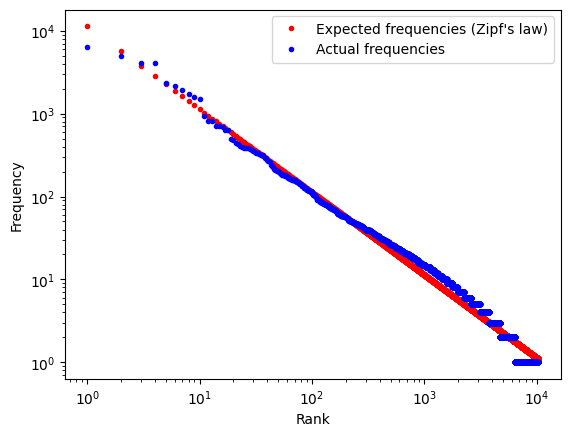

In [46]:
sorted_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

frequencies = [count for token, count in sorted_counts]

ranks = np.arange(1, len(frequencies) + 1)

A_values = []
A_values_sum = 0;
for i in range(len(frequencies)):
    
    A = (frequencies[i] / num_tokens) * ranks[i]
    A_values_sum = A_values_sum+A
    A_values.append(A)

# the best value found should be the average value since A is a constant
average= A_values_sum/len(frequencies)
print("The best value found for constant A is:",average)

expected_frequencies = [0] * len(frequencies)

# expected frequencies  (solved for A)
for i in range(len(frequencies)):

    expected_frequencies[i] = average * num_tokens / ranks[i]

# actual frequencies vs expected frequencies

plt.plot(ranks, expected_frequencies, 'r.', label='Expected frequencies (Zipf\'s law)')
plt.plot(ranks, frequencies, 'b.', label='Actual frequencies')

plt.xscale('log')
plt.yscale('log')


plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()


plt.show()